<a href="https://colab.research.google.com/github/easyhardhoon/FBF-TF-hoon/blob/hoon/utils/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [20]:
def read_data(file_name):
    data = pd.read_excel(file_name)
    return data
data = read_data('/reg_mob_nx.xlsx') #can change reg_mob_od, reg_eff_nx, reg_eff_od

In [21]:
num_models = 7
x_train_list = [np.array(data.iloc[1:, 3*i]).reshape(-1, 1) for i in range(num_models)] # train data
y_train_list = [np.array(data.iloc[1:, 3*i+1]).reshape(-1, 1) for i in range(num_models)] # train label
x_test_list = [np.array(data.iloc[1:, 3*i+2]).reshape(-1, 1) for i in range(num_models)] # train label
x_train_list = pd.to_numeric(x_train_list, errors='coerce')
y_train_list = pd.to_numeric(y_train_list, errors='coerce')
x_test_list = pd.to_numeric(x_test_list, errors='coerce')

In [22]:
def to_numpy_array(arr):
    if not isinstance(arr, np.ndarray):
        arr = np.array(arr)
    return arr
x_train_list = [to_numpy_array(arr) for arr in x_train_list]
y_train_list = [to_numpy_array(arr) for arr in y_train_list]
x_test_list = [to_numpy_array(arr) for arr in x_test_list]
for i in range(num_models):
    not_nan_index = ~pd.isnull(x_train_list[i]) & ~pd.isnull(y_train_list[i]) & ~pd.isnull(x_test_list[i])
    x_train_list[i] = x_train_list[i][not_nan_index].reshape(-1, 1)
    y_train_list[i] = y_train_list[i][not_nan_index].reshape(-1, 1)
    x_test_list[i] = x_test_list[i][not_nan_index].reshape(-1, 1)

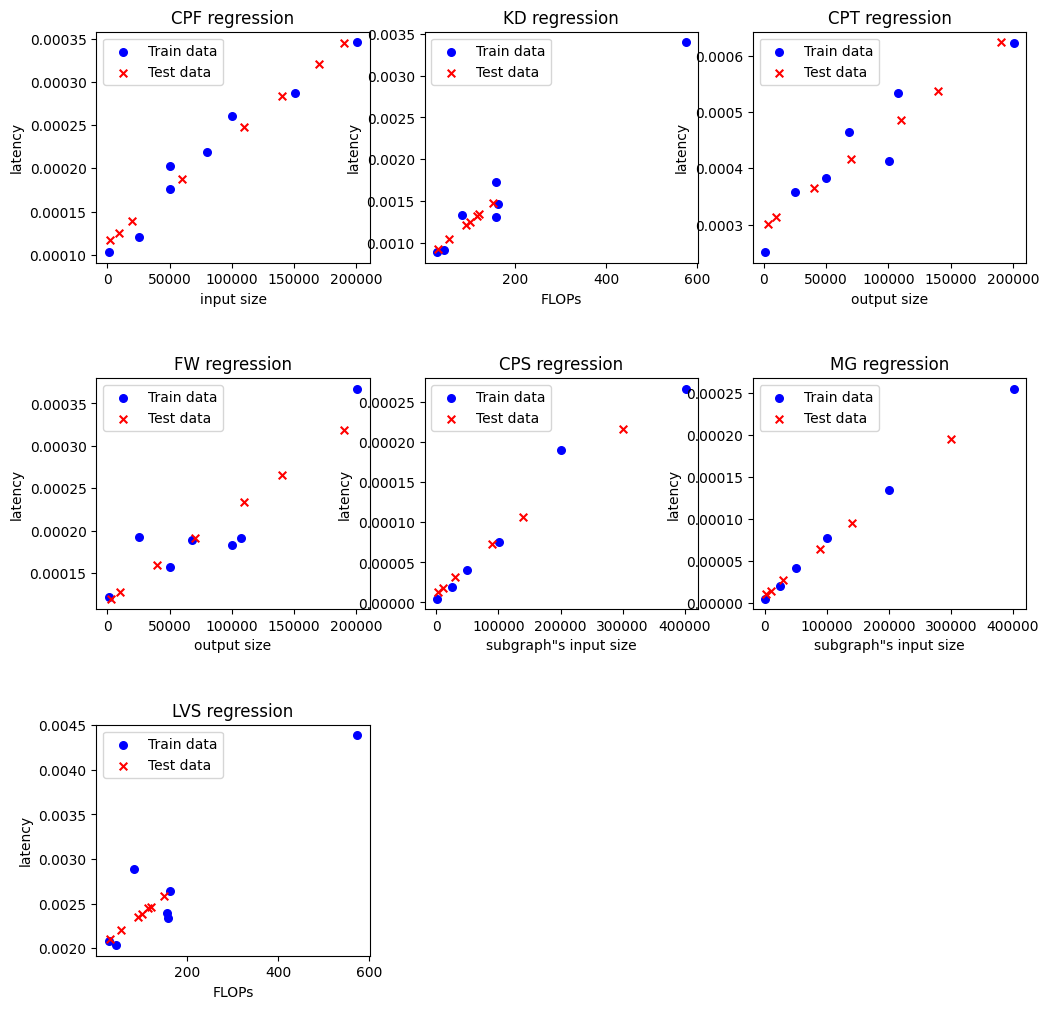

In [25]:
models = [LinearRegression() for _ in range(num_models)]
fig = plt.figure(figsize=(12,12))
for i in range(num_models):
    model = models[i]
    model.fit(x_train_list[i], y_train_list[i])

    x_train = x_train_list[i]
    y_train = y_train_list[i]
    x_test = x_test_list[i]

    pred = model.predict(x_test)

    ax = fig.add_subplot(3, 3, i + 1)
    ax.scatter(x_train, y_train, s=30, c='b', marker='o', label='Train data')
    ax.scatter(x_test, pred, s=30, c='r', marker='x', label='Test data')
    if i==0:
        ax.set_title(f'CPF regression')
        ax.set_xlabel('input size')
        ax.set_ylabel('latency')
    elif i==1:
        ax.set_title(f'KD regression')
        ax.set_xlabel('FLOPs')
        ax.set_ylabel('latency')
    elif i==2:
        ax.set_title(f'CPT regression')
        ax.set_xlabel('output size')
        ax.set_ylabel('latency')
    elif i==3:
        ax.set_title(f'FW regression')
        ax.set_xlabel('output size')
        ax.set_ylabel('latency')
    elif i==4:
        ax.set_title(f'CPS regression')
        ax.set_xlabel('subgraph"s input size')
        ax.set_ylabel('latency')
    elif i==5:
        ax.set_title(f'MG regression')
        ax.set_xlabel('subgraph"s input size')
        ax.set_ylabel('latency')
    elif i==6:
        ax.set_title(f'LVS regression')
        ax.set_xlabel('FLOPs')
        ax.set_ylabel('latency')
    ax.legend()
plt.subplots_adjust(hspace=0.5)
plt.show()
